In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\DATASETS\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape


(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
#Putting the comma seperated strings into a list
df['listed_in']=df['listed_in'].str.split(',')

In [7]:
# Creating a copy of unnested column
df_unnested=df.explode('listed_in').reset_index(drop=True)

In [8]:
df_unnested.isna().sum()

show_id            0
type               0
title              0
director        5884
cast            1504
country         1722
date_added        20
release_year       0
rating             6
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df_unnested['director']=df_unnested['director'].fillna('unknown director')
df_unnested['country']=df_unnested['country'].fillna('unknown country')
df_unnested['cast']=df_unnested['cast'].fillna('unknown cast')
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [10]:
df_unnested.dropna(inplace=True,axis=0,subset=['date_added','rating'])

In [11]:
df_unnested.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [12]:
#unnested the cast column
df_unnested['cast']=df_unnested['cast'].str.split(',')
df_cast=df_unnested.explode('cast').reset_index(drop=True)
df_cast.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
df['director']=df['director'].fillna('unknown director')
df['country']=df['country'].fillna('unknown country')
df['cast']=df['cast'].fillna('unknown cast')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown cast,unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [14]:
df.dropna(inplace=True,axis=0,subset=['date_added','rating'])
df.dropna(inplace=True,axis=0,subset=['duration'])

In [15]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
top_5_months_movies=df[df['type']=='Movie'].groupby('release_year')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_movies)

release_year
2018    767
2017    765
2016    658
2019    633
2020    517
Name: title, dtype: int64


In [17]:
## Deleting the showid,cast
df.drop('show_id',inplace=True,axis=1)
df.drop('cast',inplace=True,axis=1)

In [18]:
df['country'].value_counts()

United States                             2809
India                                      972
unknown country                            829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [19]:
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [20]:
df['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [21]:
df['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [22]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [23]:
df['country'].value_counts().iloc[:10]

United States      2809
India               972
unknown country     829
United Kingdom      418
Japan               243
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: country, dtype: int64

In [24]:
#Filtering out the rows containing  unknown director from dataframe
df[df['director']!='unknown director']['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4526, dtype: int64

<Axes: xlabel='type', ylabel='count'>

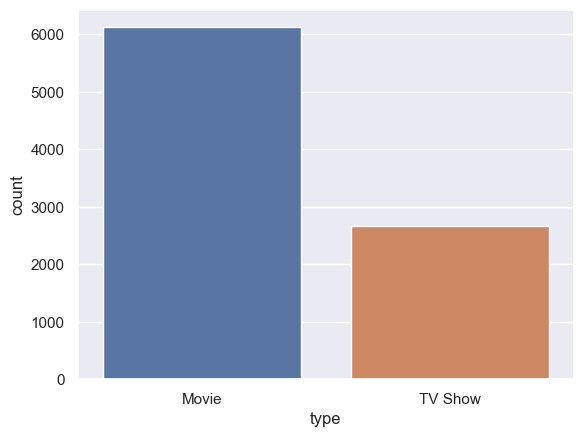

In [25]:
#visualize the data
sns.set(style="darkgrid")
sns.countplot(x="type",data=df)

In [26]:
top_10_countries=df['country'].value_counts().iloc[:10]

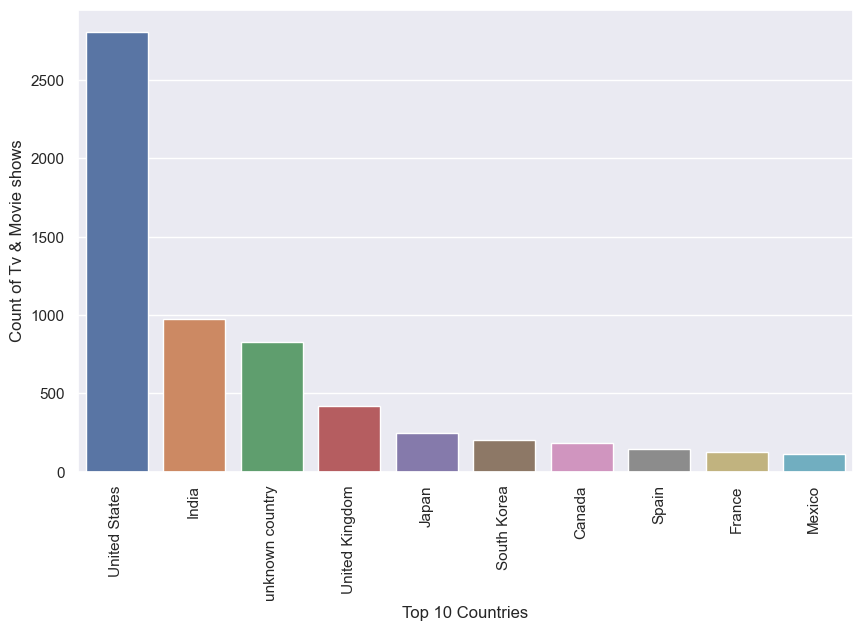

In [27]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [28]:
top_5_rating=df['rating'].value_counts().iloc[:5]

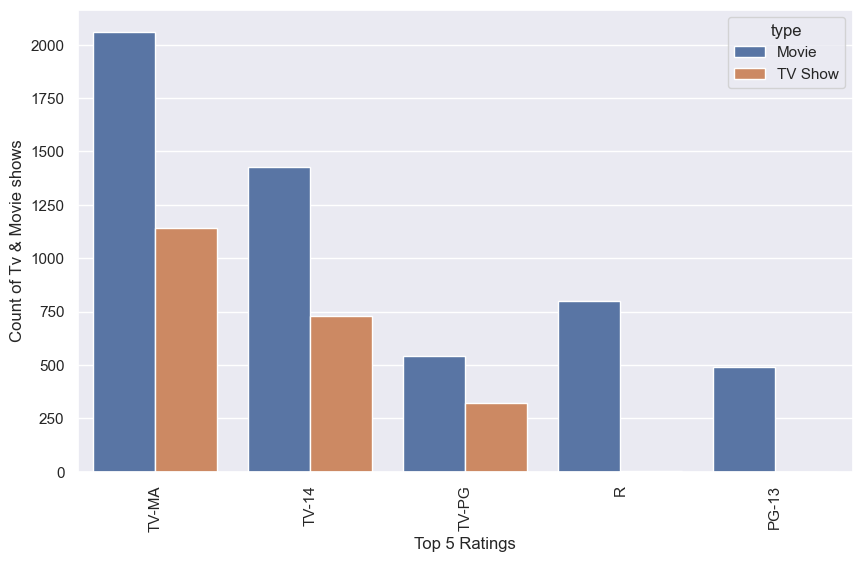

In [29]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(data=df[df['rating'].isin(top_5_rating.index)],x='rating',order=top_5_rating.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 5 Ratings')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [30]:
top_10_directors=df[df['director']!='unknown director']['director'].value_counts().sort_values(ascending=False).iloc[:10]

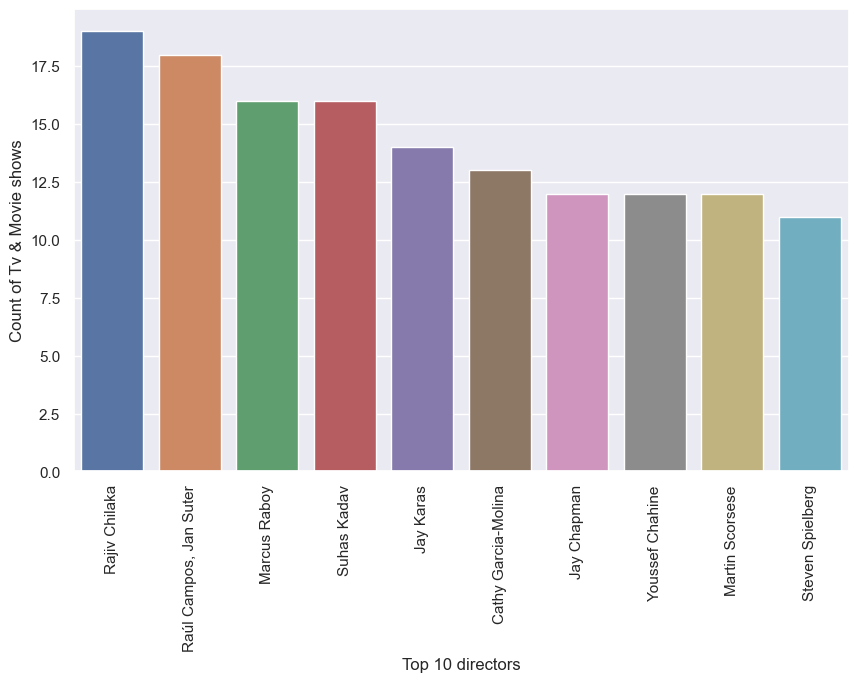

In [31]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(data=df[df['director'].isin(top_10_directors.index)],x='director',order=top_10_directors.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 directors')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [32]:
top_10_year=df['release_year'].value_counts().sort_values(ascending=False).iloc[:10]

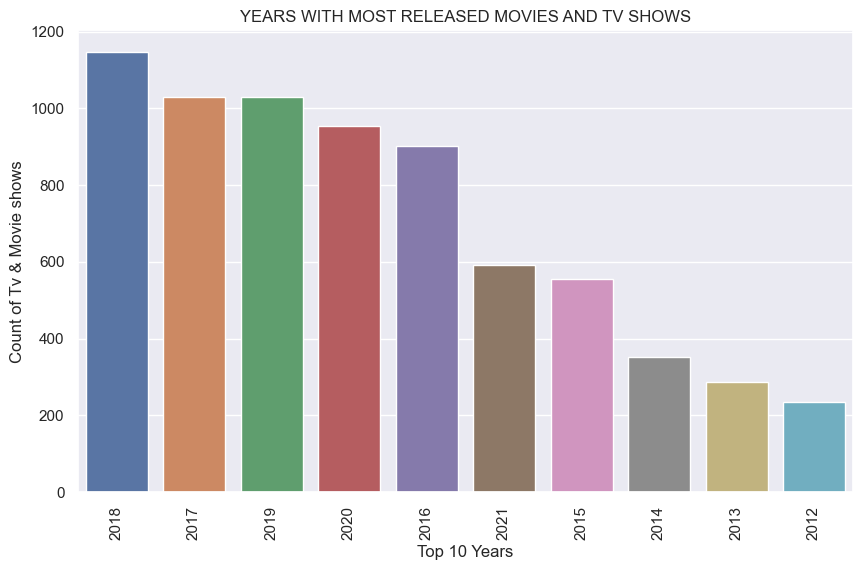

In [33]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(data=df[df['release_year'].isin(top_10_year.index)],x='release_year',order=top_10_year.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Years')
plt.ylabel('Count of Tv & Movie shows')
plt.title('YEARS WITH MOST RELEASED MOVIES AND TV SHOWS')
plt.show()

In [34]:
top_10_country_movies=df[df['type']=='Movie'].groupby('country').aggregate({'title':'count'}).reset_index().sort_values(by='title',ascending=False).rename(columns={'title':'Count of Movies'}).iloc[:10]
top_10_country_movies

,country,Count of Movies
525,United States,2055
218,India,893
651,unknown country,439
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
428,Turkey,76


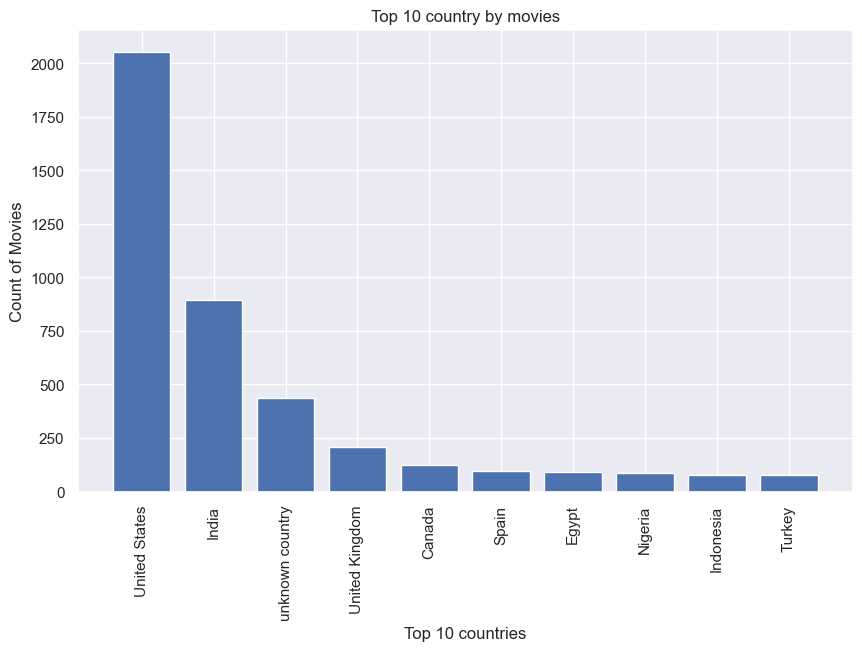

In [35]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
plt.bar(x=top_10_country_movies['country'],height=top_10_country_movies['Count of Movies'])
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Movies')
plt.title('Top 10 country by movies')
plt.show()

In [36]:
top_10_country_Tv_show=df[df['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_country_Tv_show

country
United States      754
unknown country    390
United Kingdom     212
Japan              167
South Korea        158
India               79
Taiwan              68
Canada              59
France              49
Spain               48
Name: title, dtype: int64

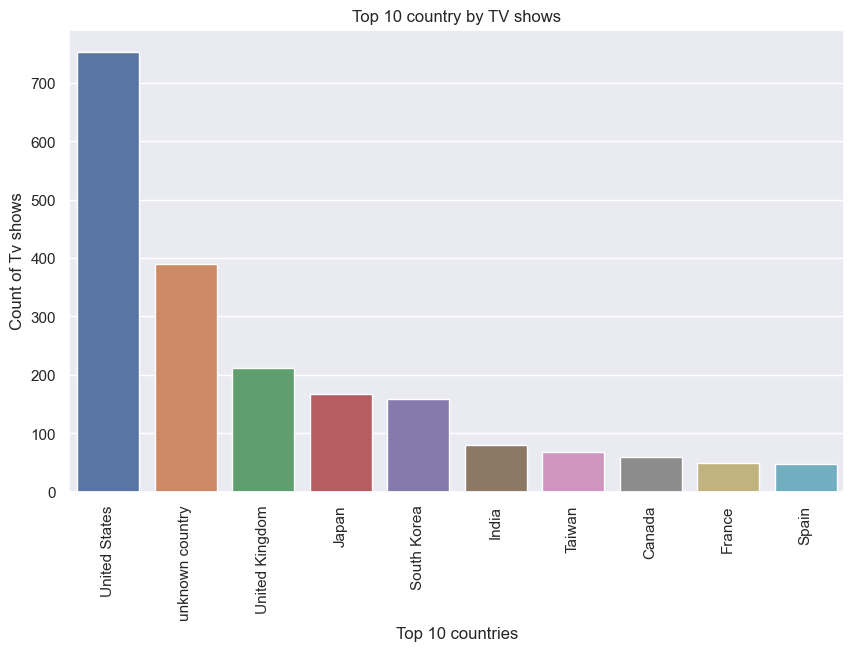

In [37]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.barplot(x=top_10_country_Tv_show.index,y=top_10_country_Tv_show.values,order=top_10_country_Tv_show.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Tv shows')
plt.title('Top 10 country by TV shows')
plt.show()

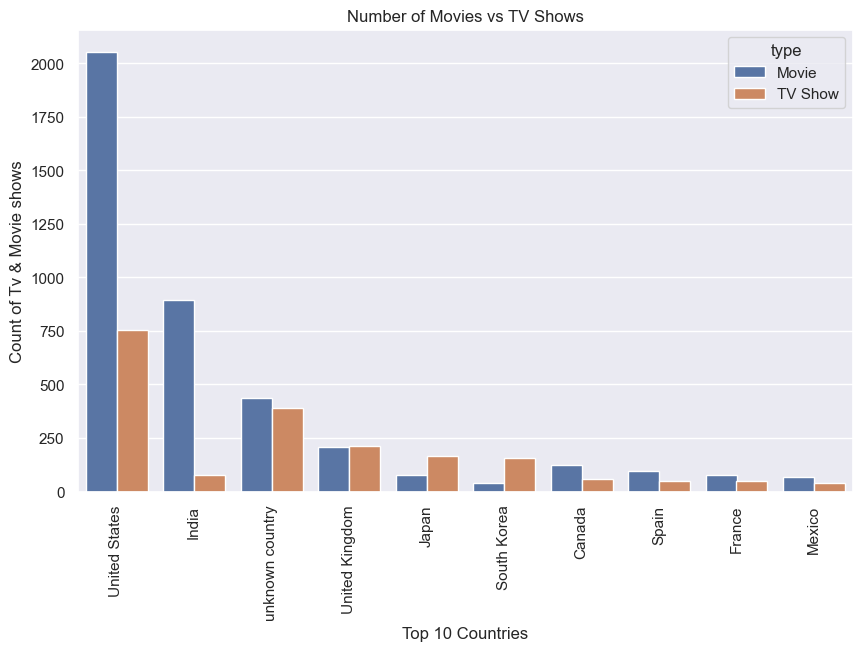

In [38]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.title('Number of Movies vs TV Shows')
plt.show()

In [39]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')
df['week_added'] = df['date_added'].dt.isocalendar().week
df['month_added']=df['date_added'].dt.month_name()
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",38,September
1,TV Show,Blood & Water,unknown director,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",38,September
2,TV Show,Ganglands,Julien Leclercq,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,38,September
3,TV Show,Jailbirds New Orleans,unknown director,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",38,September
4,TV Show,Kota Factory,unknown director,India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,38,September


In [40]:
top_10_weeks_TV_show=df[df['type']=='TV Show'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_weeks_TV_show)

week_added
27    86
31    83
13    76
44    75
24    75
35    74
26    73
5     72
40    72
50    70
Name: title, dtype: int64


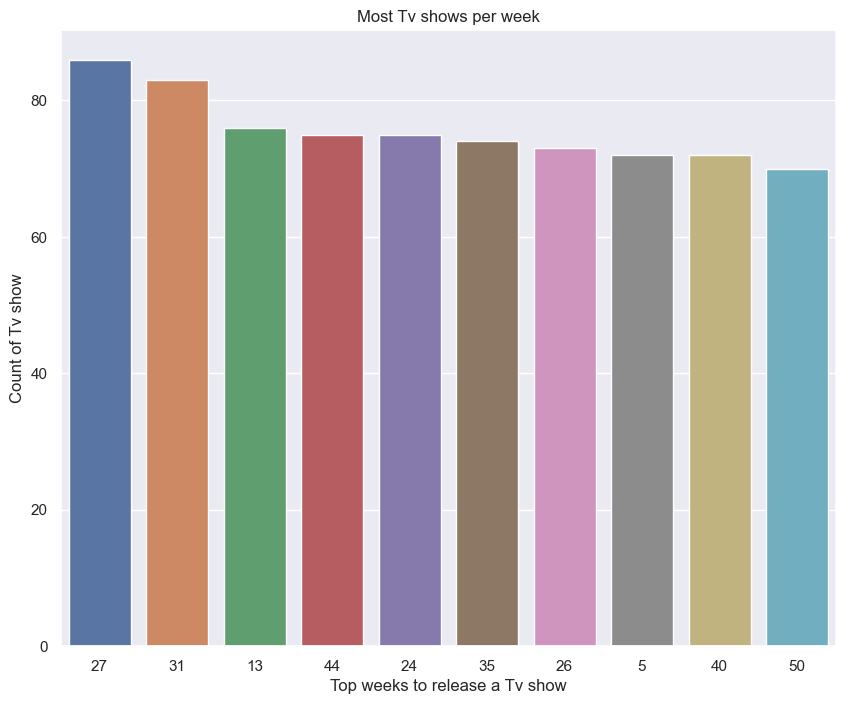

In [41]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(x=top_10_weeks_TV_show.index,y=top_10_weeks_TV_show.values,order=top_10_weeks_TV_show.index)
plt.xlabel('Top weeks to release a Tv show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv shows per week')
plt.show()

In [42]:
top_10_weeks_Movies=df[df['type']=='Movie'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_weeks_Movies)

week_added
1     316
44    243
40    215
9     206
26    195
35    189
31    185
13    174
18    173
27    154
Name: title, dtype: int64


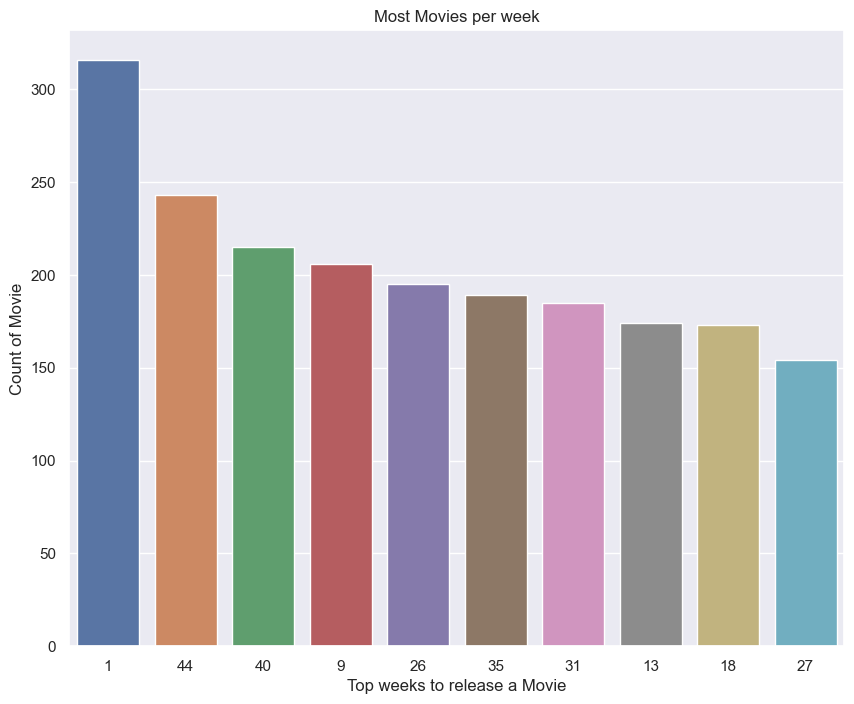

In [43]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(x=top_10_weeks_Movies.index,y=top_10_weeks_Movies.values,order=top_10_weeks_Movies.index)
plt.xlabel('Top weeks to release a Movie')
plt.ylabel('Count of Movie')
plt.title('Most Movies per week')
plt.show()

In [44]:
top_5_months_movies=df[df['type']=='Movie'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_movies)

month_added
July        565
April       549
December    547
January     545
October     545
Name: title, dtype: int64


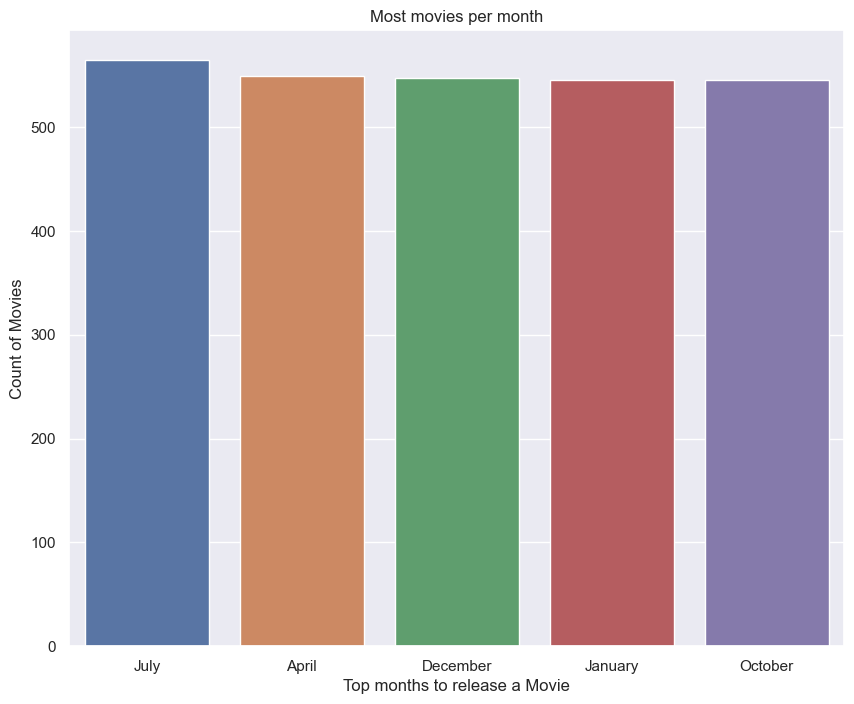

In [45]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(x=top_5_months_movies.index,y=top_5_months_movies.values,order=top_5_months_movies.index)
plt.xlabel('Top months to release a Movie')
plt.ylabel('Count of Movies')
plt.title('Most movies per month')
plt.show()

In [46]:
top_5_months_Tv_shows=df[df['type']=='TV Show'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_Tv_shows)

month_added
December     265
July         262
September    251
August       236
June         236
Name: title, dtype: int64


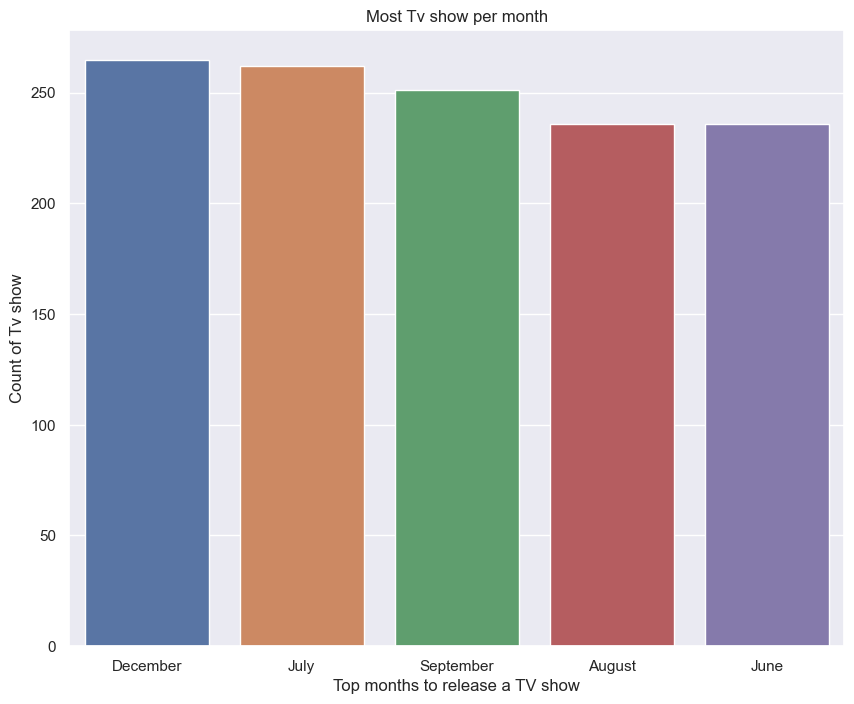

In [47]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(x=top_5_months_Tv_shows.index,y=top_5_months_Tv_shows.values,order=top_5_months_Tv_shows.index)
plt.xlabel('Top months to release a TV show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv show per month')
plt.show()

In [48]:
df_cast['cast']=df_cast['cast'].str.strip()

In [49]:
top_10_actor_movie=df_cast[(df_cast['type']=='Movie')&(df_cast['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_movie

cast
Anupam Kher         117
Shah Rukh Khan       99
Naseeruddin Shah     92
Akshay Kumar         85
Paresh Rawal         79
Om Puri              78
Amitabh Bachchan     76
Boman Irani          72
Kareena Kapoor       67
Salman Khan          59
Name: title, dtype: int64

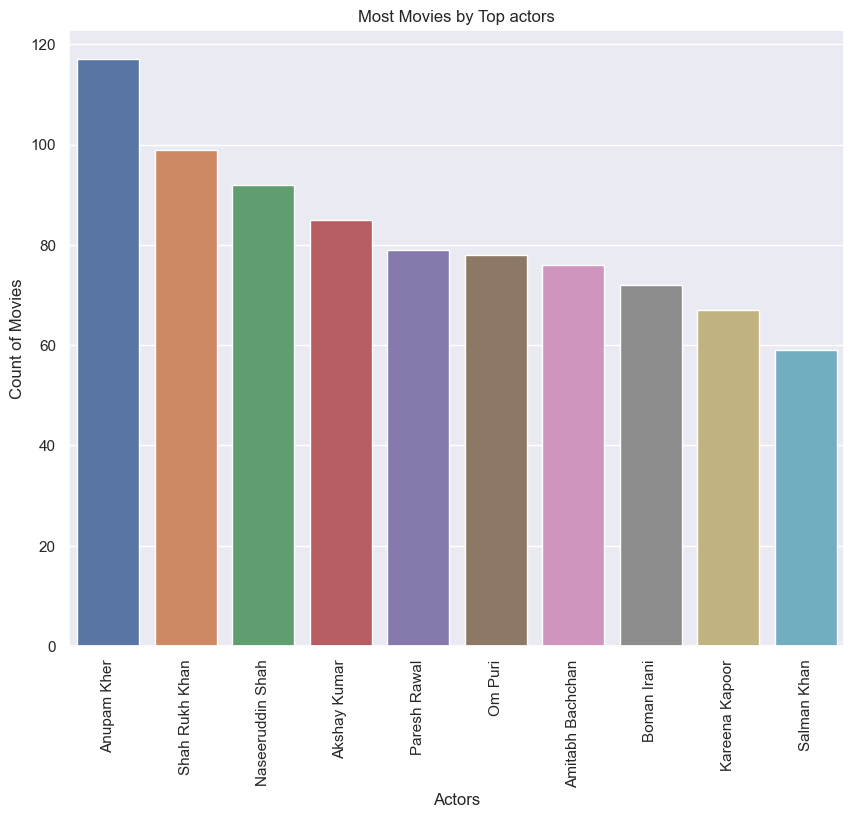

In [50]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(x=top_10_actor_movie.index,y=top_10_actor_movie.values,order=top_10_actor_movie.index)
plt.xlabel('Actors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top actors')
plt.xticks(rotation=90)
plt.show()

In [51]:
top_10_actor_Tv_show=df_cast[(df_cast['type']=='TV Show')&(df_cast['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_Tv_show

cast
Takahiro Sakurai      55
Yuki Kaji             44
David Attenborough    41
Ai Kayano             39
Junichi Suwabe        38
Yuichi Nakamura       38
Daisuke Ono           37
Jun Fukuyama          36
Yoshimasa Hosoya      33
Hiroshi Kamiya        31
Name: title, dtype: int64

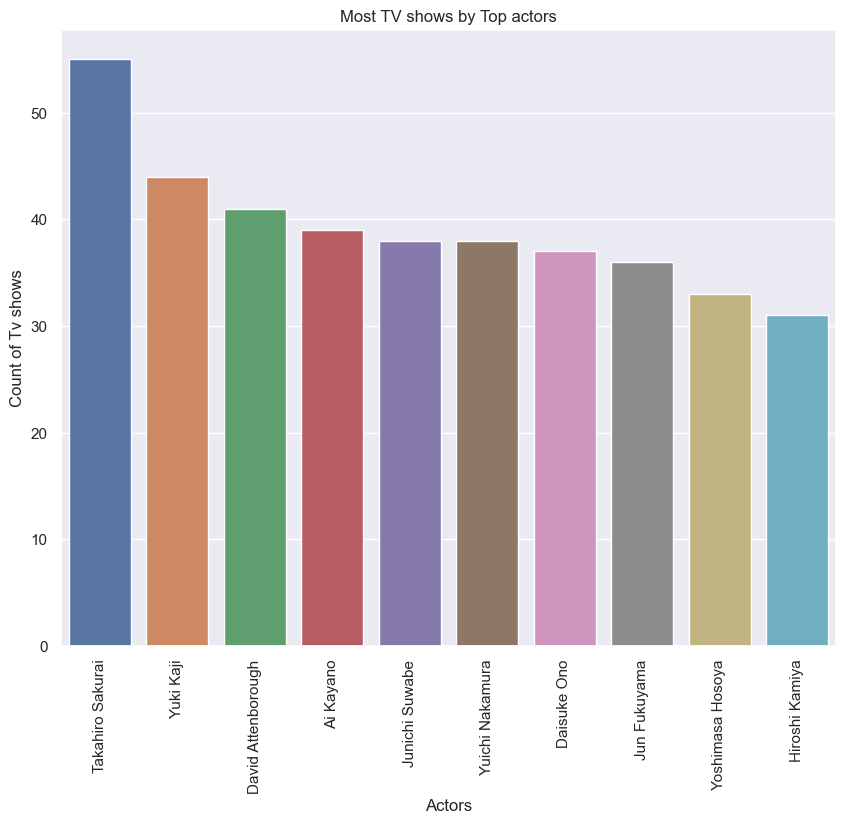

In [52]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(x=top_10_actor_Tv_show.index,y=top_10_actor_Tv_show.values,order=top_10_actor_Tv_show.index)
plt.xlabel('Actors')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Top actors')
plt.xticks(rotation=90)
plt.show()


In [53]:
#Trimming out the white spaces
df_unnested['listed_in']=df_unnested['listed_in'].str.strip()

In [54]:
df_unnested[df_unnested['type']=='Movie'].groupby('listed_in')['title'].count().sort_values(ascending=False)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Cult Movies                   71
Anime Features                71
Faith & Spirituality          65
Movies                        56
Name: title, dtype: int64

In [55]:
top_10_movie_genres=df_unnested[df_unnested['type']=='Movie']['listed_in'].value_counts().iloc[:10]

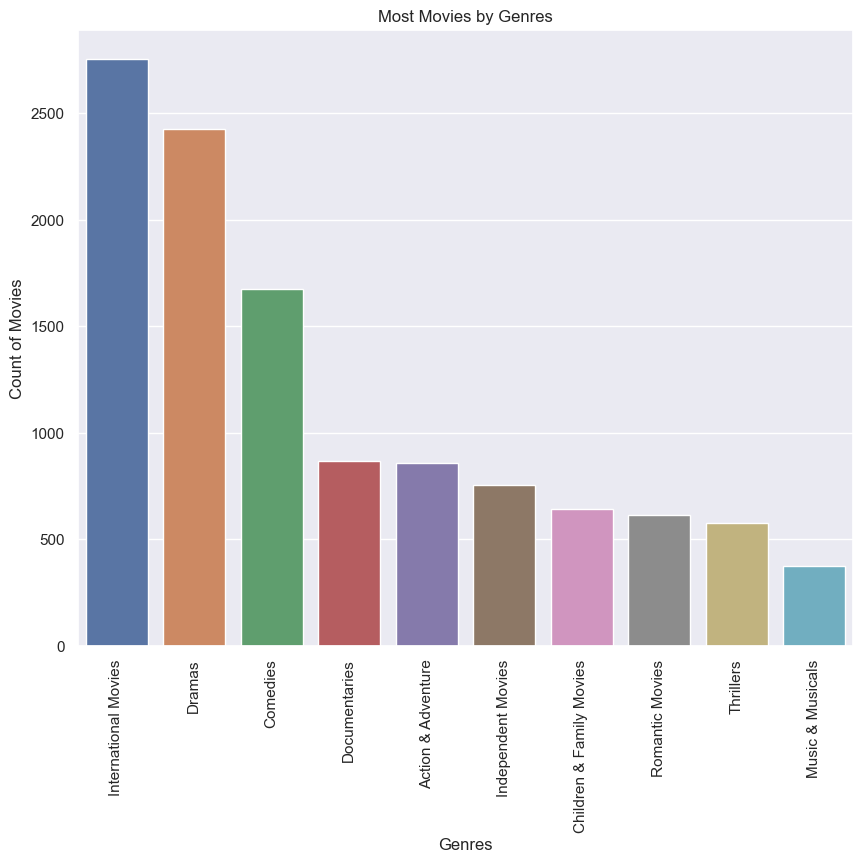

In [56]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(x=top_10_movie_genres.index,y=top_10_movie_genres.values,order=top_10_movie_genres.index)
plt.xlabel('Genres')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Genres')
plt.xticks(rotation=90)
plt.show()

In [57]:
# Concatenate all genres into a single string

df_movie_genres=df_unnested[df_unnested['type']=='Movie']
all_genres = ' '.join(df_movie_genres['listed_in'].apply(lambda x: x.replace(',', ' ')))

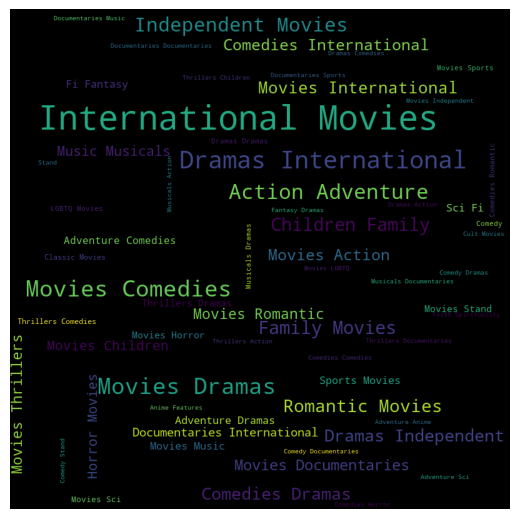

In [58]:
# Generate word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='Black',
                min_font_size = 10).generate(all_genres)

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [59]:
df_tv_show_genres=df_unnested[df_unnested['type']=='TV Show']
# Concatenate all genres into a single string
all_genres_tv_show = ' '.join(df_tv_show_genres['listed_in'].apply(lambda x: x.replace(',', ' ')))

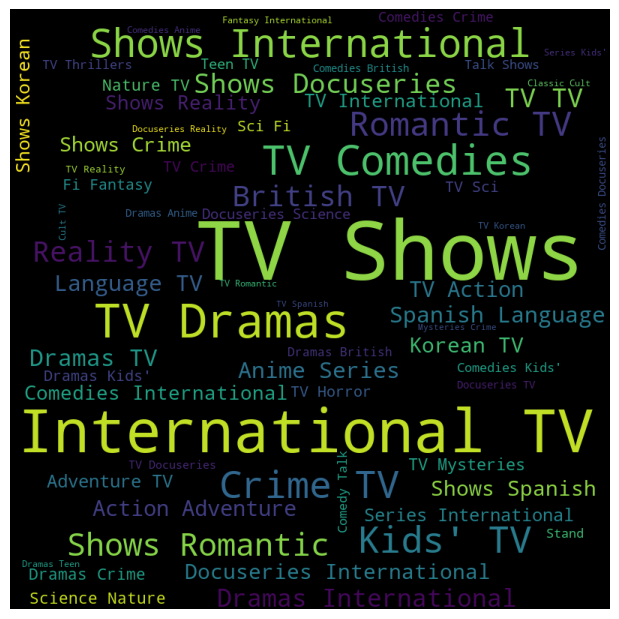

In [60]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(all_genres_tv_show)

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


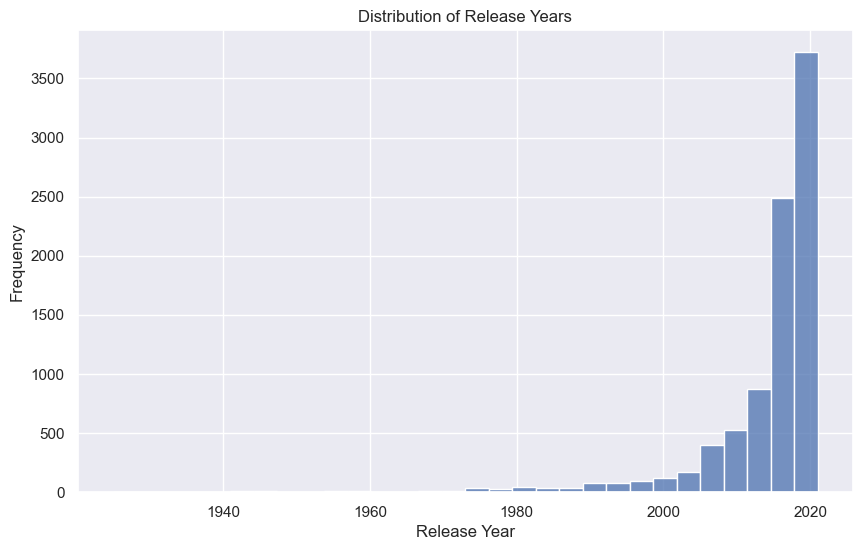

In [61]:
# Plot the distribution of release years
plt.figure(figsize=(10, 6))
plt.title('Distribution of Release Years')
sns.histplot(df['release_year'], bins=30, kde=False)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

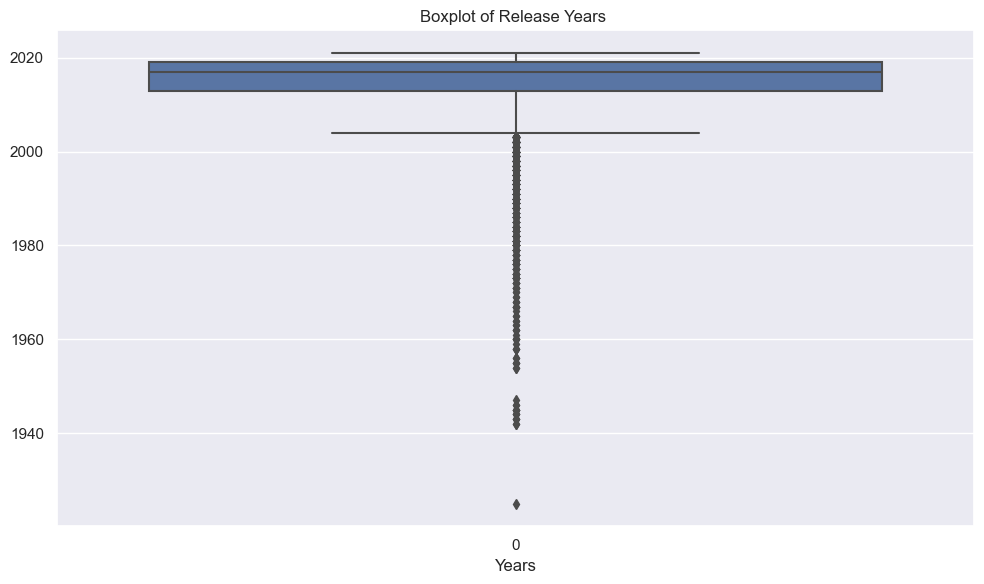

In [62]:
# Plot a boxplot of the days to add movies
plt.figure(figsize=(10, 6))
sns.boxplot(df['release_year'])
plt.title('Boxplot of Release Years ')
plt.xlabel('Years')
plt.tight_layout()
plt.show()